In [1]:
# Data Manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns

# Math Utilities
import math

# Statistical Tests
from scipy.stats import ttest_ind, chi2_contingency

# Data Splitting & Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix)

# Imbalanced Data Handling
from imblearn.over_sampling import SMOTE

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

---

#**1.Data Preparation**


In [2]:
# Load the dataset
df = pd.read_excel('/content/E Commerce Dataset.xlsx')
df

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,150.71
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,224.91
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186.42
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,178.90


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

---
###**1.1 Check missing values**


**Checking the percentage of missing values in selected columns**


In [4]:
# List of columns with missing values
df.isnull().sum().sort_values(ascending=False)

,0
DaySinceLastOrder,307
OrderAmountHikeFromlastYear,265
Tenure,264
OrderCount,258
CouponUsed,256
HourSpendOnApp,255
WarehouseToHome,251
CustomerID,0
PreferredLoginDevice,0
Churn,0


---


**Filling missing values with the mean**



In [5]:
#  get all column names with missing values
cols_with_na = df.columns[df.isnull().any()].tolist()
# Fill missing values with the mean for each column
for col in cols_with_na:
    df[col] = df[col].fillna(df[col].mean())

df.isnull().sum()

,0
CustomerID,0
Churn,0
Tenure,0
PreferredLoginDevice,0
CityTier,0
WarehouseToHome,0
PreferredPaymentMode,0
Gender,0
HourSpendOnApp,0
NumberOfDeviceRegistered,0


---


**Merging similar categories in categorical columns to ensure consistency and improve analysis quality.**


In [6]:
cat_cols = ['Gender', 'PreferredLoginDevice', 'PreferredPaymentMode', 'PreferedOrderCat', 'MaritalStatus']

print("UNIQUE VALUES BEFORE MERGING:")
for col in cat_cols:
    print(f"{col}: {df[col].unique()}")

# Merge similar categories
df['PreferredLoginDevice'] = df['PreferredLoginDevice'].replace({
    'Phone': 'Mobile Phone'
})
df['PreferredPaymentMode'] = df['PreferredPaymentMode'].replace({
    'CC': 'Credit Card',
    'COD': 'Cash on Delivery'
})
df['PreferedOrderCat'] = df['PreferedOrderCat'].replace({
    'Mobile': 'Mobile Phone'
})

print("\nUNIQUE VALUES AFTER MERGING:")
for col in cat_cols:
    print(f"{col}: {df[col].unique()}")

UNIQUE VALUES BEFORE MERGING:
Gender: ['Female' 'Male']
PreferredLoginDevice: ['Mobile Phone' 'Phone' 'Computer']
PreferredPaymentMode: ['Debit Card' 'UPI' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card']
PreferedOrderCat: ['Laptop & Accessory' 'Mobile' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']
MaritalStatus: ['Single' 'Divorced' 'Married']

UNIQUE VALUES AFTER MERGING:
Gender: ['Female' 'Male']
PreferredLoginDevice: ['Mobile Phone' 'Computer']
PreferredPaymentMode: ['Debit Card' 'UPI' 'Credit Card' 'Cash on Delivery' 'E wallet']
PreferedOrderCat: ['Laptop & Accessory' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']
MaritalStatus: ['Single' 'Divorced' 'Married']


---

**Checking for duplicate rows in the dataset**


In [7]:
df.duplicated().sum()

np.int64(0)

---

**Round float columns (except CashbackAmount) to integers.**


In [8]:
# Select all float columns except 'CashbackAmount' for rounding
float_cols_to_round = [col for col in df.select_dtypes('float').columns if col != 'CashbackAmount']
print(float_cols_to_round)

['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder']


In [9]:
# Round all selected float columns
for col in float_cols_to_round:
    df[col] = df[col].round().astype('Int64')

In [10]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4,Mobile Phone,3,6,Debit Card,Female,3,3,Laptop & Accessory,2,Single,9,1,11,1,1,5,159.93
1,50002,1,10,Mobile Phone,1,8,UPI,Male,3,4,Mobile Phone,3,Single,7,1,15,0,1,0,120.90
2,50003,1,10,Mobile Phone,1,30,Debit Card,Male,2,4,Mobile Phone,3,Single,6,1,14,0,1,3,120.28
3,50004,1,0,Mobile Phone,3,15,Debit Card,Male,2,4,Laptop & Accessory,5,Single,8,0,23,0,1,3,134.07
4,50005,1,0,Mobile Phone,1,12,Credit Card,Male,3,3,Mobile Phone,5,Single,3,0,11,1,1,3,129.60


---
---


#**2.Exploratory Data Analysis (EDA) / Statistical Analysis**


###**2.1 Data Overview**

This section provides a general overview of the dataset: size, structure.

---

In [11]:
df.shape

(5630, 20)

In [12]:
# Dataset dimensions
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

# Target variable distribution
print("\nChurn distribution:")
print(df['Churn'].value_counts())

# Percentage churn
churn_rate = df['Churn'].mean() * 100
print(f"\nChurn rate: {churn_rate:.2f}%")

Number of rows: 5630
Number of columns: 20

Churn distribution:
Churn
0    4682
1     948
Name: count, dtype: int64

Churn rate: 16.84%


In [13]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5630.0,5630.000000,5630.0,5630.0,5630.000000,5630.000000,5630.000000,5630.000000,5630.0,5630.0,5630.0,5630.0,5630.000000
mean,52815.500000,0.168384,10.180995,1.654707,15.65595,2.934636,3.688988,3.066785,4.214032,0.284902,15.72167,1.762345,3.007638,4.568384,177.223030
std,1625.385339,0.374240,8.354261,0.915389,8.339426,0.705528,1.023999,1.380194,2.583586,0.451408,3.588459,1.851764,2.871521,3.554893,49.207036
min,50001.000000,0.000000,0.0,1.000000,5.0,0.0,1.000000,1.000000,1.000000,0.000000,11.0,0.0,1.0,0.0,0.000000
25%,51408.250000,0.000000,3.0,1.000000,9.0,2.0,3.000000,2.000000,2.000000,0.000000,13.0,1.0,1.0,2.0,145.770000
50%,52815.500000,0.000000,9.0,1.000000,14.0,3.0,4.000000,3.000000,3.000000,0.000000,15.0,1.0,2.0,4.0,163.280000
75%,54222.750000,0.000000,15.0,3.000000,20.0,3.0,4.000000,4.000000,6.000000,1.000000,18.0,2.0,3.0,7.0,196.392500
max,55630.000000,1.000000,61.0,3.000000,127.0,5.0,6.000000,5.000000,22.000000,1.000000,26.0,16.0,16.0,46.0,324.990000


---

###**2.2 Numerical Feature Analysis**

In this section, we explore the main numerical features using descriptive statistics and visualize their distributions.


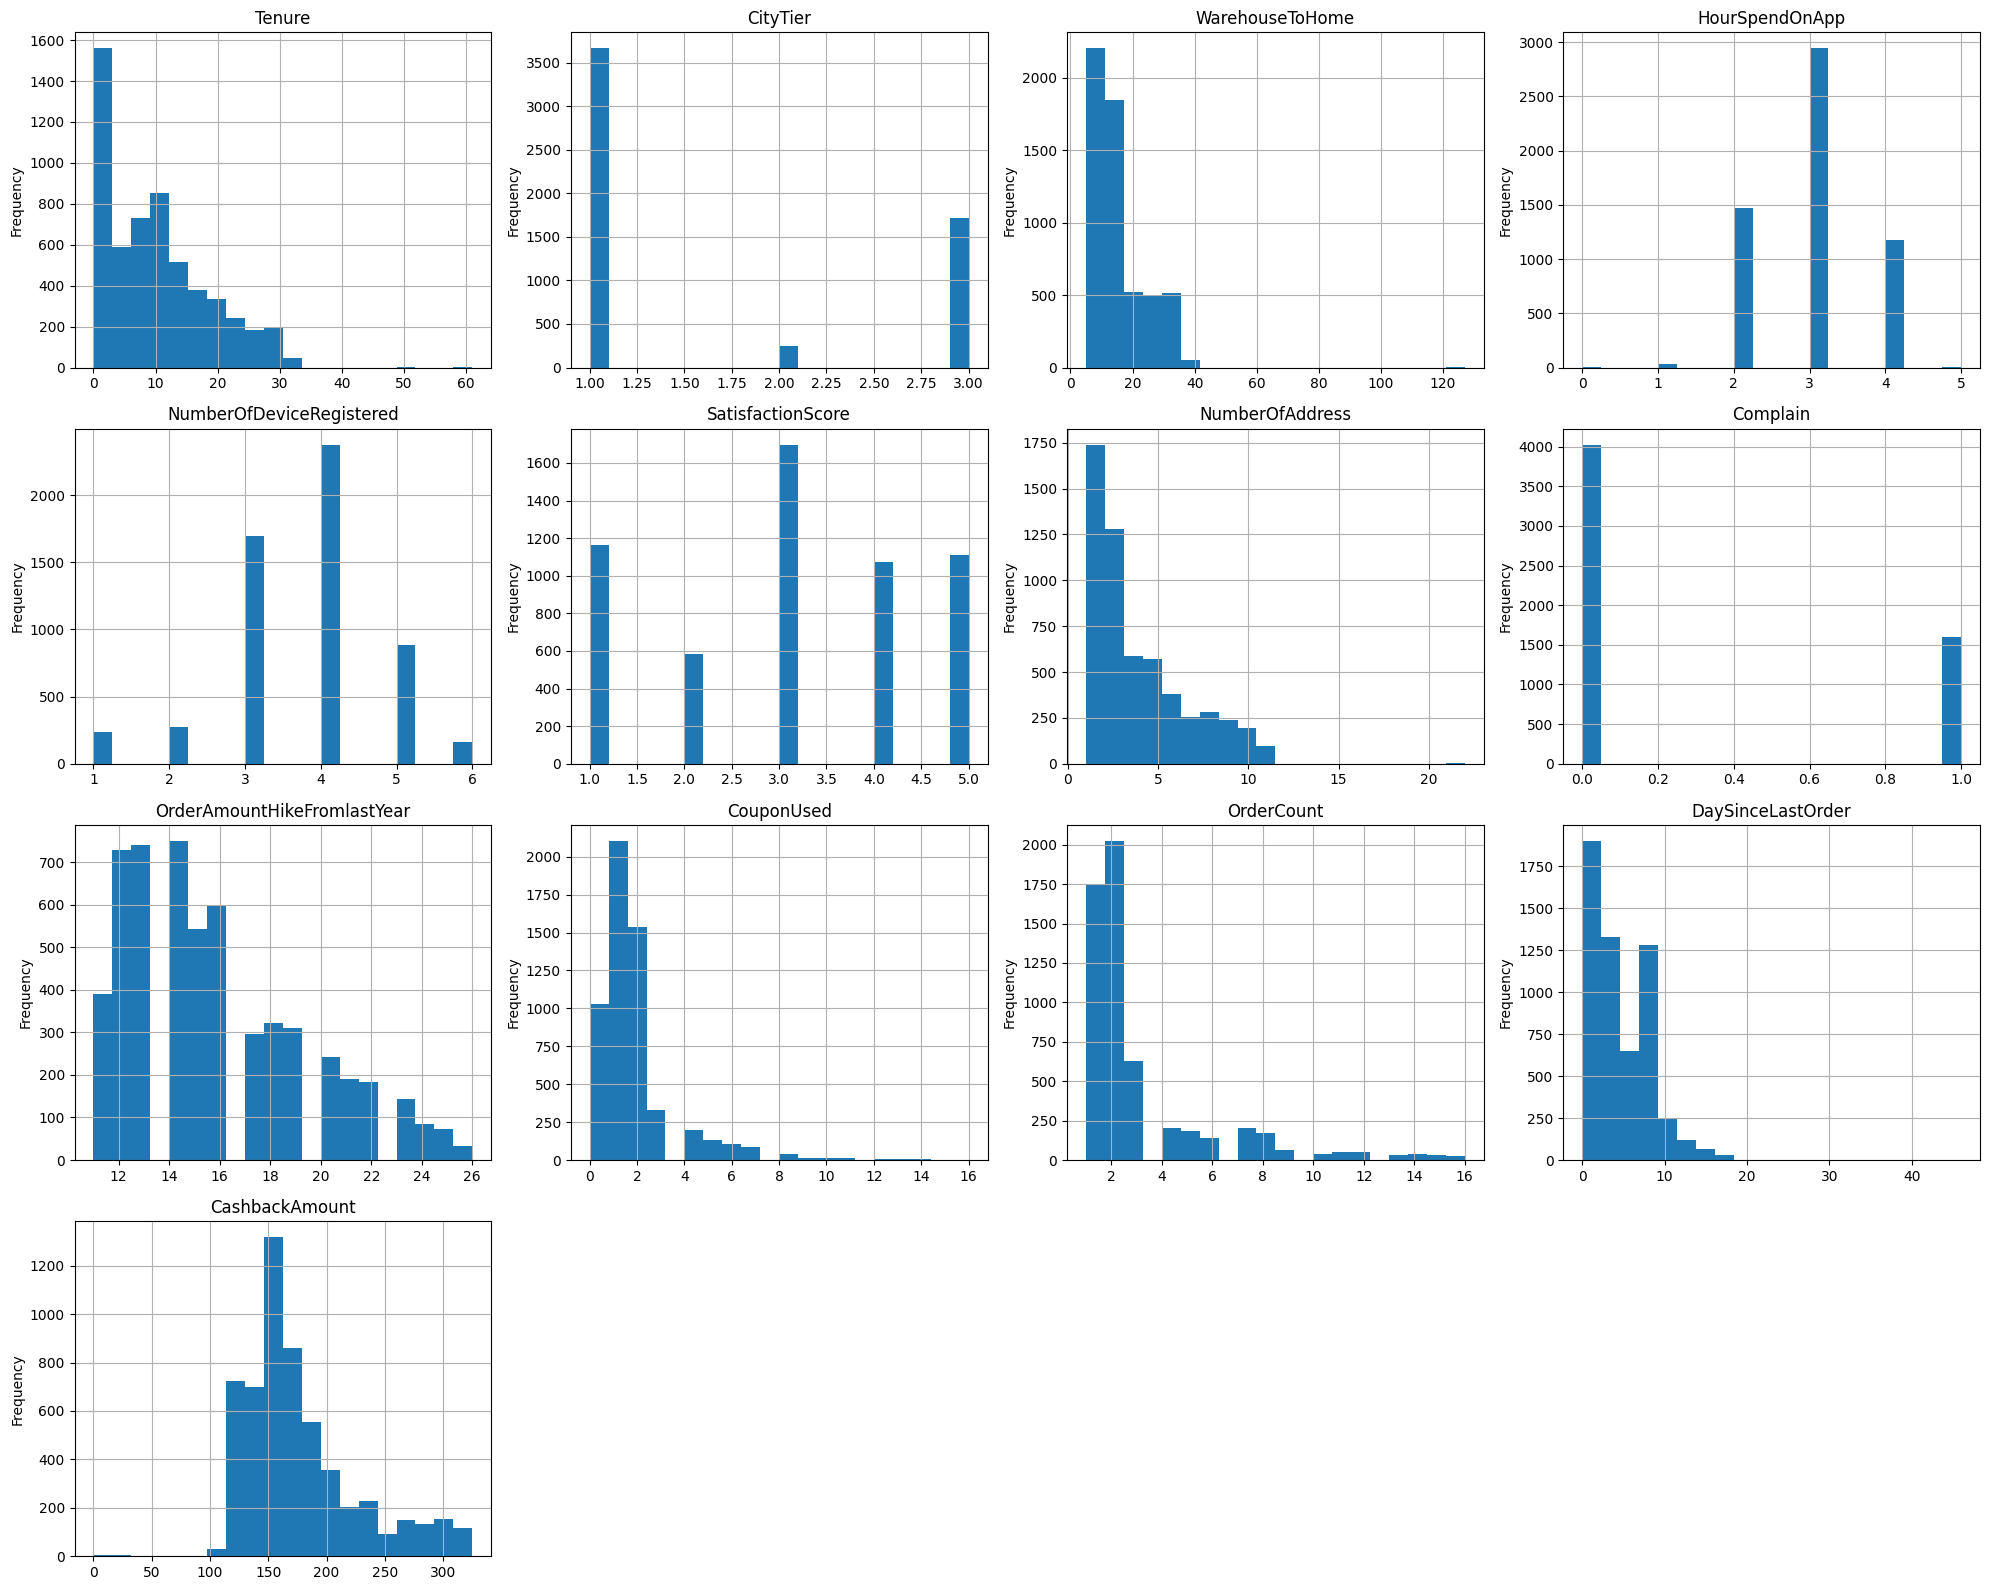

In [14]:
# Histograms for all numerical features (except CustomerID and Churn)
num_cols = df.select_dtypes(include=['int64', 'float64', 'Int64']).columns.drop(['CustomerID', 'Churn'])
cols_per_row = 4
num_rows = math.ceil(len(num_cols) / cols_per_row)

fig, axes = plt.subplots(nrows=num_rows, ncols=cols_per_row, figsize=(5*cols_per_row, 4*num_rows))
axes = axes.flatten()

# Explore the distribution of each feature
for i, col in enumerate(num_cols):
    df[col].hist(bins=20, ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Frequency')
for i in range(len(num_cols), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()


**Summary:**
- Most customers have **short tenure**, indicating a high number of new users.
- The majority live close to the warehouse, as shown by WarehouseToHome distribution.
- Most customers have not raised complaints, and satisfaction scores are usually neutral or high.
- **Significant outliers found in five features**:
WarehouseToHome, NumberOfAddress, DaySinceLastOrder, CashbackAmount, and CouponUsed.
We will address these outliers in the next section.


---
###**2.3 Outlier Detection and Removal**


Below, we visualize boxplots for five numerical features with clear outliers to identify and assess unusual or extreme values.


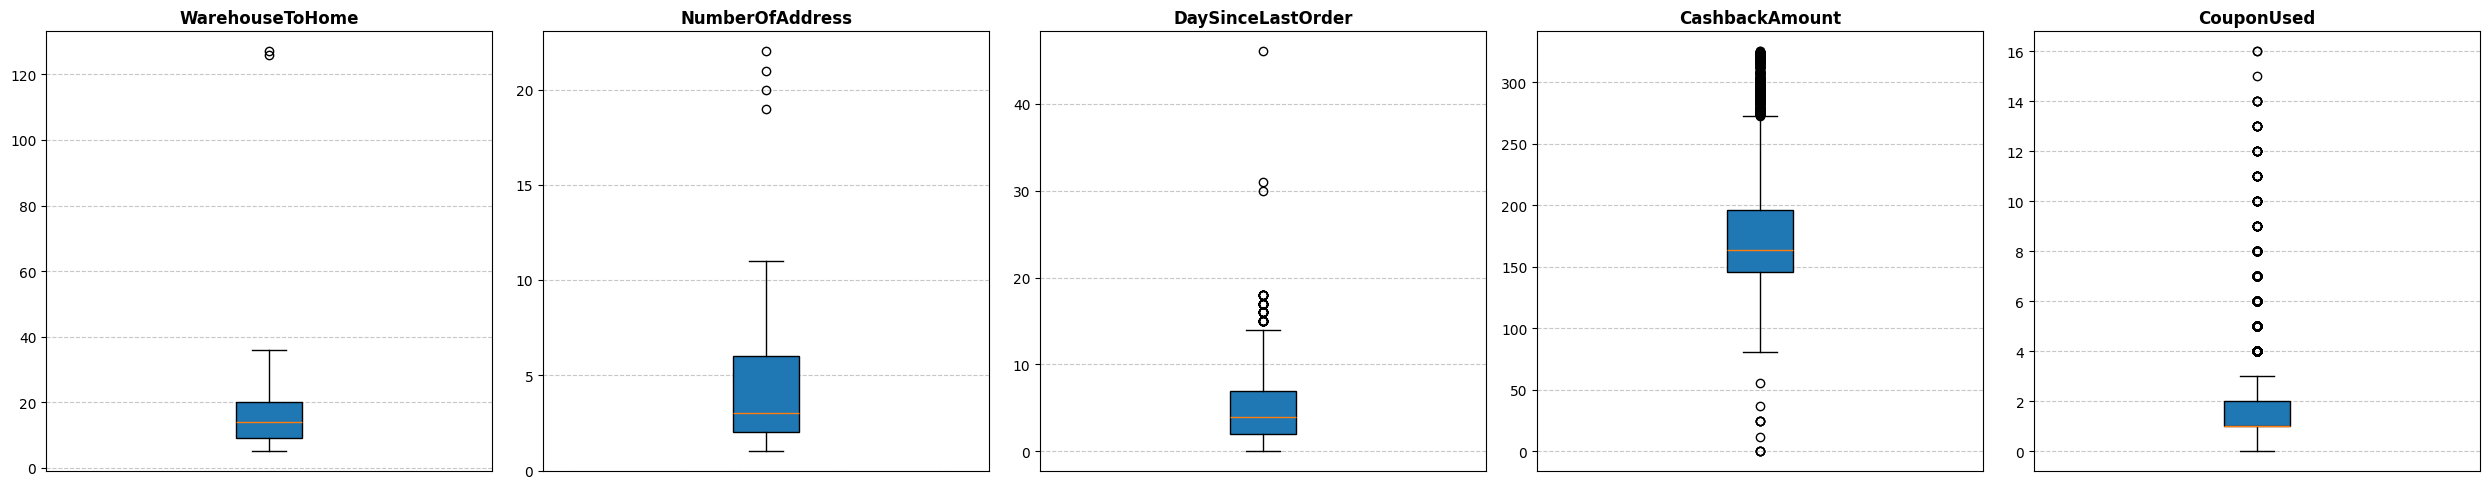

In [15]:
# Boxplots for selected features with outliers
outlier_cols = ['WarehouseToHome', 'NumberOfAddress', 'DaySinceLastOrder', 'CashbackAmount', 'CouponUsed']

fig, axes = plt.subplots(1, len(outlier_cols), figsize=(5 * len(outlier_cols), 5))

# Visualize outliers
for i, col in enumerate(outlier_cols):
    ax = axes[i]
    ax.boxplot(df[col].dropna(), vert=True, patch_artist=True)
    ax.set_title(col, fontsize=12, fontweight='bold')
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.set_xticks([])

plt.tight_layout()
plt.show()

**Outlier Analysis Summary**

- Outliers in `NumberOfAddress` and `WarehouseToHome` are likely **data errors and will be removed** to improve analysis.
- Outliers in `DaySinceLastOrder`, `CashbackAmount`, and `CouponUsed` reflect real business cases (loyal customers, high spenders, etc.) and will be kept.

In [16]:
# Remove unrealistic outliers based on business logic
df = df[df['NumberOfAddress'] <= 11]
df = df[df['WarehouseToHome'] <= 36]

---


###**2.4 Categorical Feature Analysis**

We analyze the **distribution of categorical features** to understand customer segmentation.


In [17]:
# Select main categorical columns for visualization
cat_cols = ['Gender', 'MaritalStatus', 'PreferredPaymentMode', 'PreferredLoginDevice', 'PreferedOrderCat']

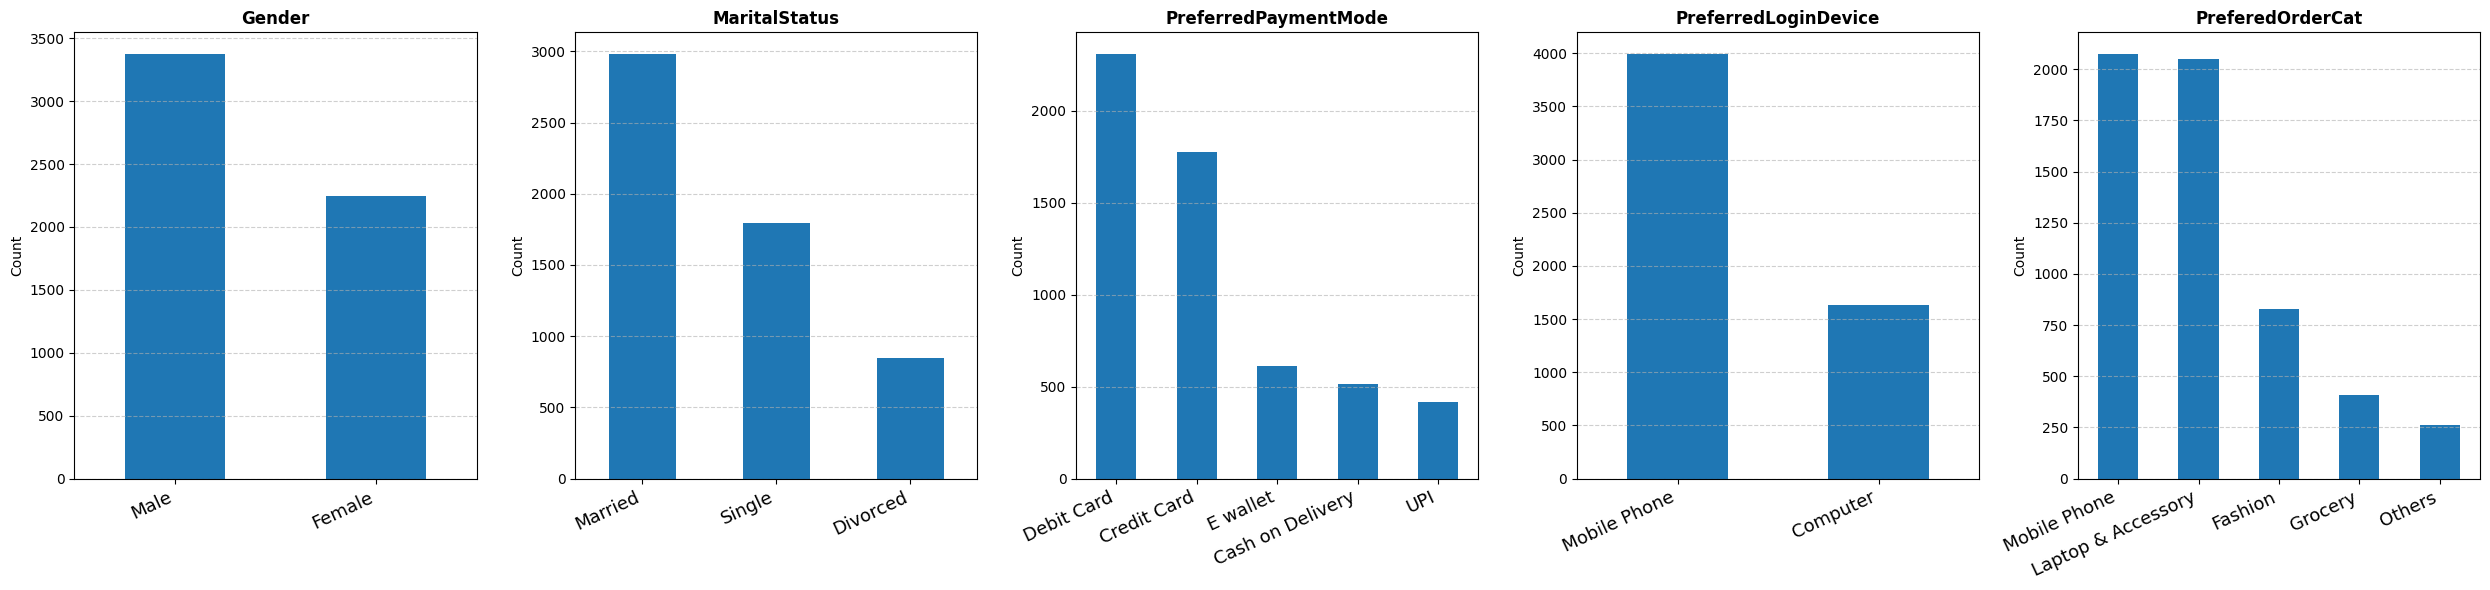

In [18]:
# Create a horizontal row of bar plots
fig, axes = plt.subplots(nrows=1, ncols=len(cat_cols), figsize=(5 * len(cat_cols), 6))

for i, col in enumerate(cat_cols):
    ax = axes[i]
    df[col].value_counts().plot(kind='bar', ax=ax)
    ax.set_title(col, fontsize=12, fontweight='bold')
    ax.set_xlabel('')
    ax.set_ylabel('Count')
    ax.grid(axis='y', linestyle='--', alpha=0.6)
    plt.setp(ax.get_xticklabels(), rotation=25, ha='right', fontsize=13)

plt.tight_layout()
plt.show()



**Summary:**
Most customers are male and married, prefer mobile phone login, use debit or credit cards for payment, and mainly order mobile phones or accessories.

---


###**2.5 Churn Group Comparison**


compare the distributions of key **numerical** features.



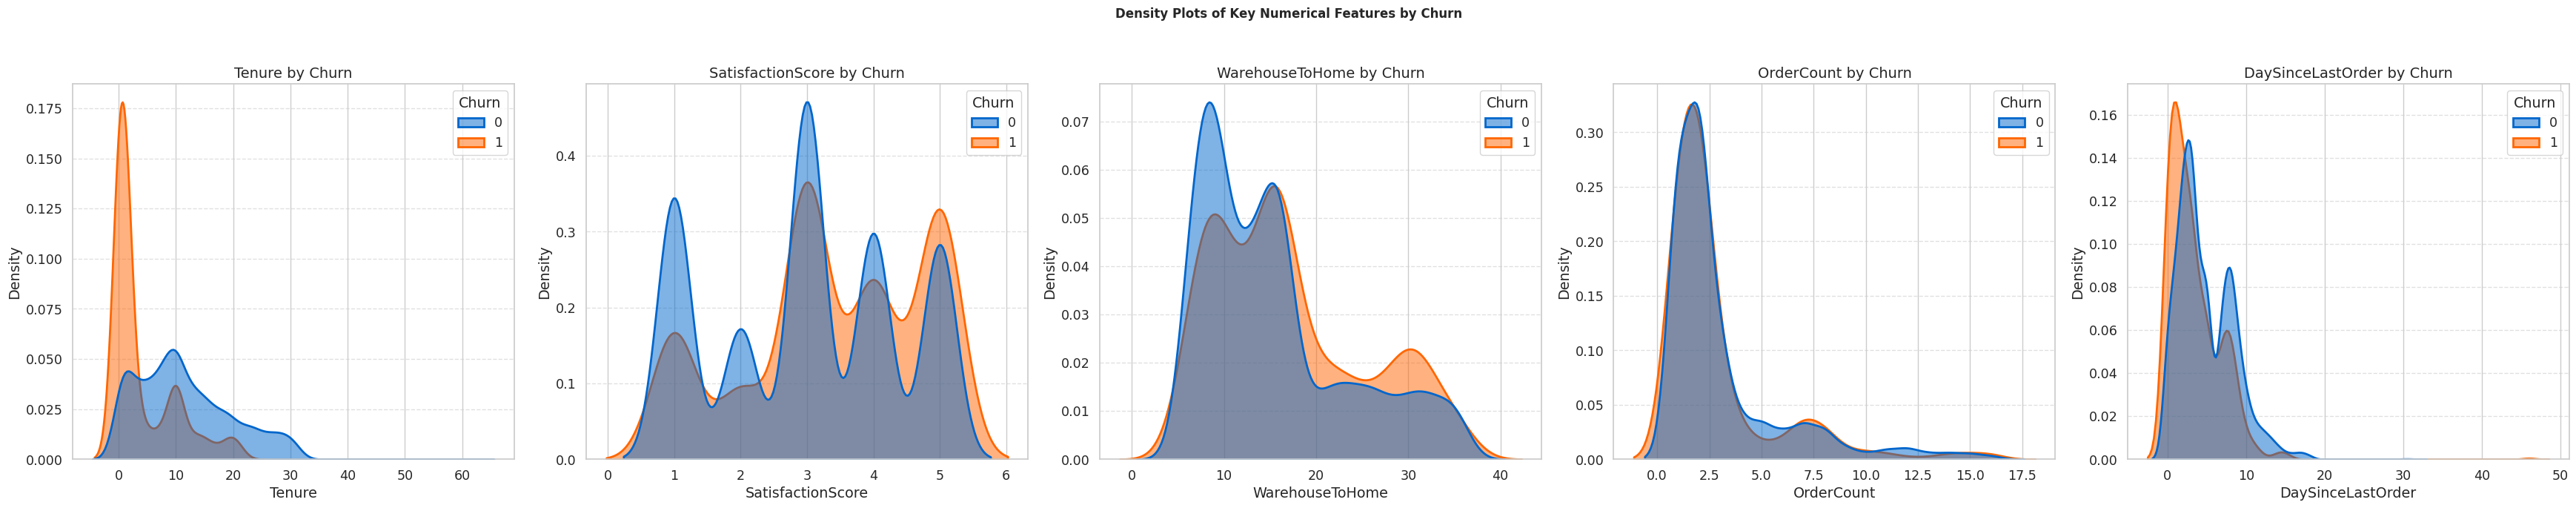

In [19]:
# Density plots of key numerical features by churn status
sns.set_theme(style='whitegrid', font_scale=1.15)
num_cols = ['Tenure', 'SatisfactionScore', 'WarehouseToHome', 'OrderCount', 'DaySinceLastOrder']
colors = ['#0066CC', '#FF6600']


fig, axes = plt.subplots(1, len(num_cols), figsize=(7 * len(num_cols), 7))

for i, col in enumerate(num_cols):
    sns.kdeplot(
        data=df, x=col, hue='Churn', fill=True, palette=colors,
        hue_order=[0, 1], common_norm=False, alpha=0.5, linewidth=2, ax=axes[i]
    )
    axes[i].set_title(f"{col} by Churn", fontsize=14)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')
    axes[i].grid(axis='y', linestyle='--', alpha=0.6)

plt.suptitle('Density Plots of Key Numerical Features by Churn', fontsize=12, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()



**Summary:**
- Churned customers **have significantly lower tenure** compared to retained ones, indicating that new users are more likely to leave.
- The difference in satisfaction score between churned and retained customers is also noticeable, with churned users tending to rate lower.
- For other features, the distributions are similar between groups and do not show pronounced differences.

---



Сompare the distribution of key **categorical** features



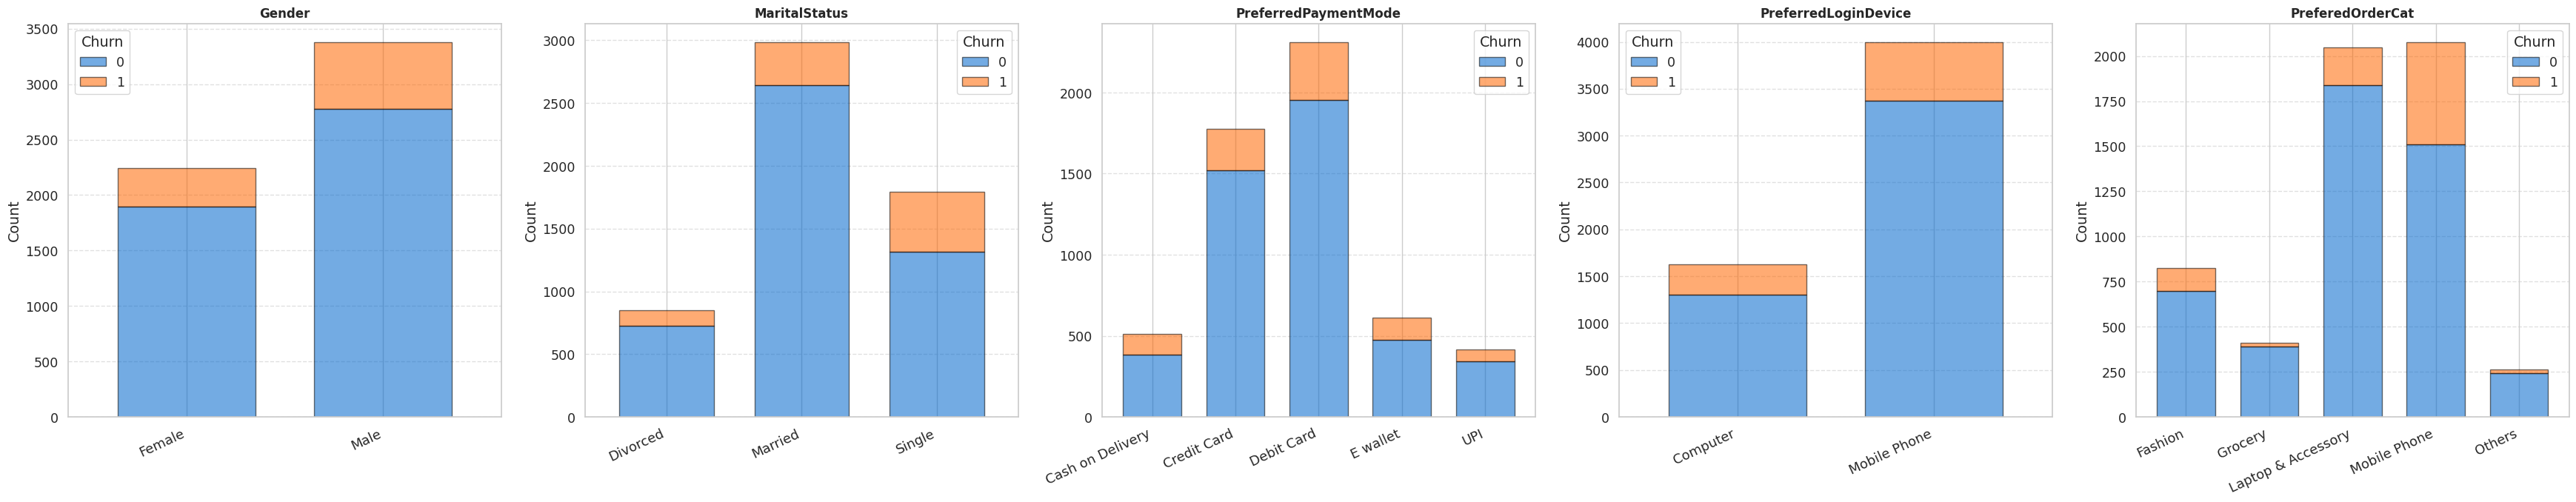

In [20]:
# Visualize Churn distribution across key categorical features
cat_cols = ['Gender', 'MaritalStatus', 'PreferredPaymentMode', 'PreferredLoginDevice', 'PreferedOrderCat']
colors = ['#0066CC', '#FF6600']

fig, axes = plt.subplots(1, len(cat_cols), figsize=(7 * len(cat_cols), 7))

for i, col in enumerate(cat_cols):
    churn_counts = df.groupby([col, 'Churn']).size().unstack(fill_value=0)[[0, 1]]
    churn_counts.plot(
        kind='bar', stacked=True, ax=axes[i],
        color=colors,
        edgecolor='black',
        width=0.7,
        alpha=0.55
    )
    axes[i].set_title(col, fontsize=12, fontweight='bold')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')
    axes[i].legend(title='Churn', labels=['0', '1'])
    axes[i].grid(axis='y', linestyle='--', alpha=0.6)
    plt.setp(axes[i].get_xticklabels(), rotation=25, ha='right', fontsize=13)

plt.tight_layout()
plt.show()


**Summary (Categorical Features Churn Comparison)**
- Churn is distributed fairly evenly between Married and Single.
- The most **preferred payment methods** are **Credit Card and Debit Card**, with similar churn distributions.
- In Preferred Order Category, **Mobile Phone** dominates, with three times more users than Laptop & Accessory. However, Laptop & Accessory also captures a significant share.

---


###**2.6 Correlation Analysis**

Here, we analyze the **correlation matrix of numerical features** to identify relationships between variables and understand which features are most strongly associated with customer churn.



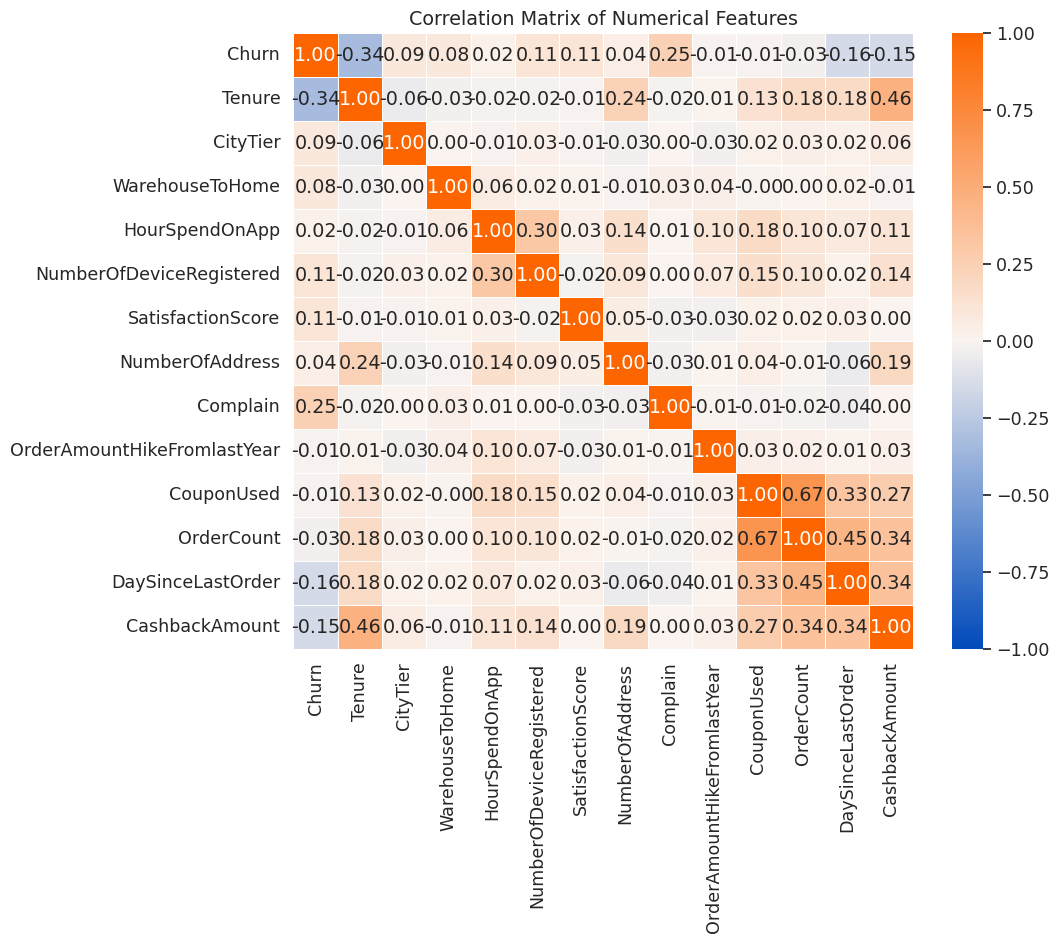

In [21]:
# Select only numeric columns for correlation analysis
num_cols = df.select_dtypes(include=['int64', 'float64', 'Int64']).columns.drop(['CustomerID'])
corr_matrix = df[num_cols].corr()

# Create a custom blue-white-orange colormap
colors = ['#004aba', '#faf4f0', '#fc6500']
custom_cmap = LinearSegmentedColormap.from_list('custom_cmap', colors, N=256)

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap=custom_cmap,
    linewidths=0.5,
    vmin=-1, vmax=1
)
plt.title('Correlation Matrix of Numerical Features')
plt.show()


**Summary of Correlation Matrix:**

- There is a strong negative correlation between **Churn** and **Tenure** — customers with longer tenure are less likely to churn, while newer users are at higher risk.
- **Complain** is moderately positively correlated with Churn — customers who have recently filed complaints are more likely to leave.
- **DaySinceLastOrder** shows a weak negative correlation — the longer since a customer's last order, the higher the risk of churn.
- **SatisfactionScore** has a very weak positive correlation with Churn — lower satisfaction is slightly associated with higher churn, but the effect is minor.
- Other features show little to no correlation with churn.

**Conclusion:**  
The most relevant predictors of churn are **Tenure**, **Complain**, and **DaySinceLastOrder**. These should be prioritized in further analysis and modeling.

---


###**2.7 Statistical Hypothesis Testing**

Here, we test whether the most important features differ significantly between churned and non-churned customers.

* For **numerical features**, we use the **t-test.**

* For **categorical features**, we use **chi-square test.**


In [22]:
num_features = ['Tenure', 'SatisfactionScore', 'OrderCount', 'WarehouseToHome']

for feature in num_features:
    churned = df[df['Churn'] == 1][feature]
    retained = df[df['Churn'] == 0][feature]
    stat, p = ttest_ind(churned, retained, equal_var=False)
    print(f"{feature}: t-statistic = {stat:.2f}, p-value = {p:.4f}")

Tenure: t-statistic = -34.46, p-value = 0.0000
SatisfactionScore: t-statistic = 8.15, p-value = 0.0000
OrderCount: t-statistic = -2.16, p-value = 0.0310
WarehouseToHome: t-statistic = 5.87, p-value = 0.0000



**Numerical Features (t-test) Summary:**
- Churned customers have **significantly lower tenure** than retained ones (p < 0.001).
- **Satisfaction scores are lower** among churned customers (p < 0.001).
- Average order count differs between churned and retained customers (p = 0.031).
- Churned customers **live farther from the warehouse** on average (p < 0.001).

---

In [23]:


cat_features = ['Complain', 'MaritalStatus', 'Gender', 'PreferredPaymentMode']

for feature in cat_features:
    contingency = pd.crosstab(df[feature], df['Churn'])
    chi2, p, dof, expected = chi2_contingency(contingency)
    print(f"{feature}: chi2 = {chi2:.2f}, p-value = {p:.4f}")

Complain: chi2 = 347.55, p-value = 0.0000
MaritalStatus: chi2 = 187.02, p-value = 0.0000
Gender: chi2 = 4.55, p-value = 0.0330
PreferredPaymentMode: chi2 = 49.95, p-value = 0.0000




**Categorical Features (chi-square) Summary:**
- **Customer complaints** are strongly associated with churn (p < 0.001).
- **Marital status** shows a significant relationship with churn (p < 0.001).
- **Gender** is weakly but significantly linked to churn (p = 0.033).
- **Payment mode** also correlates with churn (p < 0.001).

---

###**2.8 Key Insights EDA:**

- **Churned customers** typically have **short tenure**, **lower satisfaction**, and **more complaints**.
- Customers who live **farther from the warehouse** are more likely to churn.
- **Marital status** and **payment method** both significantly influence churn probability.
- The most common churned segment is **new, less active customers** who reported **service issues**.
- These findings should drive **targeted retention strategies** and form the basis of the **churn prediction model**.

---
---



#**3. Feature Engineering**

###**3.1 Creating Features**

Creating tenure groups for more interpretable customer segmentation

In [24]:
# Create bins and labels for tenure groups
bins = [0, 3, 6, 12, df['Tenure'].max()]
labels = ['New (< 3 months)', 'Recent (3-6 months)', 'Stable (6-12 months)', 'Loyal (12+ months)']

df['Tenure_Group'] = pd.cut(df['Tenure'], bins=bins, labels=labels, include_lowest=True)

# Optional: check value counts in each group
print(df['Tenure_Group'].value_counts())

Tenure_Group
Loyal (12+ months)      1893
Stable (6-12 months)    1582
New (< 3 months)        1559
Recent (3-6 months)      590
Name: count, dtype: int64


* To check the correlation we will make a hitmap

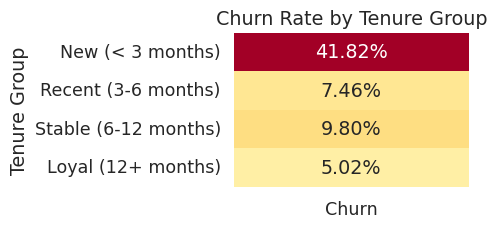

In [25]:
# Calculate churn rate for each tenure group
churn_rate_tenure = df.groupby('Tenure_Group', observed=True)['Churn'].mean().reset_index()
churn_rate_tenure.set_index('Tenure_Group', inplace=True)

plt.figure(figsize=(5, 2.5))
sns.heatmap(
    churn_rate_tenure[['Churn']],
    annot=True, fmt=".2%", cmap='YlOrRd', cbar=False,
    vmin=0, vmax=0.45
)
plt.title('Churn Rate by Tenure Group')
plt.xlabel('')
plt.ylabel('Tenure Group')
plt.tight_layout()
plt.show()

**Summary: Churn Rate by Tenure Group**

- **Customers with tenure less than 3 months have extremely high churn rate (42%).**
- All other groups have much lower churn rates (5–10%).
- The most loyal customers (12+ months) are least likely to churn.
- This shows early retention is the biggest challenge for the business.

---

Creating **RFM** Features

RFM (Recency, Frequency, Monetary) analysis is a classic approach to segmenting customers by behavior in e-commerce.  
- **Recency**: How recently a customer made a purchase (`DaySinceLastOrder`)
- **Frequency**: How often they purchase (`OrderCount`)
- **Monetary**: How much they spend (using `CashbackAmount` as a proxy)

We'll generate R, F, and M scores for each customer to identify the most loyal, valuable, and at-risk segments.

In [26]:
# RFM feature engineering

# Recency
df['R_Score'] = pd.qcut(df['DaySinceLastOrder'], 3, labels=[3, 2, 1]).astype(int)

# Frequency
df['F_Score'] = pd.qcut(df['OrderCount'].rank(method='first'), 3, labels=[1, 2, 3]).astype(int)

# Monetary
df['M_Score'] = pd.qcut(df['CashbackAmount'].rank(method='first'), 3, labels=[1, 2, 3]).astype(int)


df['RFM_Score'] = df['R_Score'] + df['F_Score'] + df['M_Score']

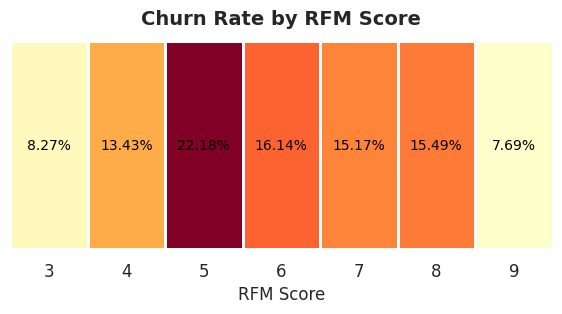

In [27]:

# 1. group churn rate
churn_rate_rfm = df.groupby('RFM_Score', observed=True)['Churn'].mean().reset_index()
churn_rate_rfm['Churn'] = churn_rate_rfm['Churn'] * 100

# visualization
plt.figure(figsize=(7, 2.7))
data = churn_rate_rfm.set_index('RFM_Score').T
data_str = data.map(lambda x: f'{x:.2f}%' if pd.notnull(x) else '', na_action='ignore')

sns.heatmap(
    data,
    annot=data_str.values,
    fmt='',
    cmap='YlOrRd',
    cbar=False,
    linewidths=1,
    annot_kws={"fontsize":10, "fontweight":'normal', "color":"black"}
)
plt.title('Churn Rate by RFM Score', fontsize=14, fontweight='bold', pad=12)
plt.yticks([])
plt.xlabel('RFM Score', fontsize=12)
plt.xticks(fontsize=12)
plt.show()

**Summary: Churn Rate by RFM Score**

* **Highest churn rate** is for customers with RFM **Score 5** (22.18%).
* Mid-range scores (4,6,7,8) show moderate churn (13–16%).
* Lowest churn is seen for RFM Scores 3 and 9.
* Customers with moderate engagement/spending are at higher churn risk.
* Both low- and high-engagement groups are more stable


In [28]:
#export df to csv.
df.to_csv('df_final.csv', index=False)

Export Dataset to csv before one-hot encoding

To make it easier to manipulate data in Tableau

---
---

###**3.2 One-Hot Encoding of Categorical Features**

We convert categorical features into numerical format using one-hot encoding, which is essential for machine learning models.



In [29]:
# List of categorical columns to encode (excluding target and ID)
cat_features = [
    'Gender', 'MaritalStatus', 'PreferredPaymentMode',
    'PreferredLoginDevice', 'PreferedOrderCat', 'Tenure_Group', 'RFM_Score'
]

# One-hot encoding with 1/0 values, drop_first to avoid multicollinearity
df_encoded = pd.get_dummies(df, columns=cat_features, drop_first=True)

# Ensure all bool columns are converted to int (just in case)
for col in df_encoded.columns:
    if df_encoded[col].dtype == 'bool':
        df_encoded[col] = df_encoded[col].astype(int)

# Preview the resulting DataFrame
df_encoded.head()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,...,PreferedOrderCat_Others,Tenure_Group_Recent (3-6 months),Tenure_Group_Stable (6-12 months),Tenure_Group_Loyal (12+ months),RFM_Score_4,RFM_Score_5,RFM_Score_6,RFM_Score_7,RFM_Score_8,RFM_Score_9
0,50001,1,4,3,6,3,3,2,9,1,...,0,1,0,0,0,1,0,0,0,0
1,50002,1,10,1,8,3,4,3,7,1,...,0,0,1,0,0,1,0,0,0,0
2,50003,1,10,1,30,2,4,3,6,1,...,0,0,1,0,1,0,0,0,0,0
3,50004,1,0,3,15,2,4,5,8,0,...,0,0,0,0,1,0,0,0,0,0
4,50005,1,0,1,12,3,3,5,3,0,...,0,0,0,0,1,0,0,0,0,0


###**3.3 Key Insights Feature Engineering:**  
Key features were engineered:  
- **Tenure Groups** for customer life stage segmentation  
- **RFM scores** for multi-dimensional value and risk analysis  
These features will improve churn prediction and business insight.

* One-hot encoding has been applied to all categorical columns.

* All features are now fully numeric and ready for modeling.


---
---

#**4. Model Preparation & Training**

###**4.1. Train/Test Split**
We split the data into training and test sets.


In [30]:
# Features:
X = df_encoded.drop(['CustomerID', 'Churn'], axis=1)
y = df_encoded['Churn']

# Stratified split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

print('Train shape:', X_train.shape)
print('Test shape:', X_test.shape)
print('Churn rate in train:', y_train.mean())
print('Churn rate in test:', y_test.mean())

Train shape: (4499, 37)
Test shape: (1125, 37)
Churn rate in train: 0.1682596132473883
Churn rate in test: 0.168


---

###**4.2 Class Balance Analysis**
* Handled class imbalance **only on training set**(not test)

* Used SMOTE to generate synthetic samples for minority class

* Balanced classes enable fairer model training and improved recall.




* **Pie chart of class distribution before SMOTE.**

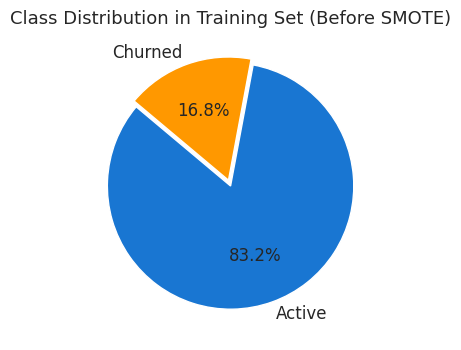

In [31]:
# Plot pie chart for class distribution in y_train
labels = ['Active', 'Churned']
sizes = y_train.value_counts().sort_index().values
colors = ['#1976D2', '#FF9800']

plt.figure(figsize=(4,4))
plt.pie(
    sizes, labels=labels, autopct='%1.1f%%', startangle=140,
    colors=colors, explode=[0, 0.05], textprops={'fontsize':12}
)
plt.title('Class Distribution in Training Set (Before SMOTE)', fontsize=13)
plt.show()

---


* **Convert integer columns to float to avoid SMOTE type errors.**

In [32]:
# Convert all integer columns to float before applying SMOTE
int_cols = [
    'OrderCount', 'CouponUsed', 'DaySinceLastOrder',
    'WarehouseToHome', 'NumberOfDeviceRegistered', 'Tenure',
    'HourSpendOnApp', 'NumberOfAddress', 'OrderAmountHikeFromlastYear'
]
for col in int_cols:
    if col in X_train.columns:
        X_train[col] = X_train[col].astype(float)

---

* **Apply SMOTE to balance the target classes in training data.**

In [33]:
# Apply SMOTE to balance the target classes
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

print("After SMOTE:", y_train_bal.value_counts())

After SMOTE: Churn
0    3742
1    3742
Name: count, dtype: int64


---

* **Round all numeric columns to remove SMOTE fractions.**
* **Convert to int if all values are integers.**

In [34]:
# Round numeric columns after SMOTE to avoid fractional values
for col in int_cols:
    if col in X_train_bal.columns:
        X_train_bal[col] = X_train_bal[col].round()  # keep as float

# Optionally convert columns to int if all values are integers
for col in int_cols:
    if col in X_train_bal.columns:
        # Convert to int if all values are integers
        if (X_train_bal[col] % 1 == 0).all():
            X_train_bal[col] = X_train_bal[col].astype(int)

---

* **Pie chart of class distribution after SMOTE.**

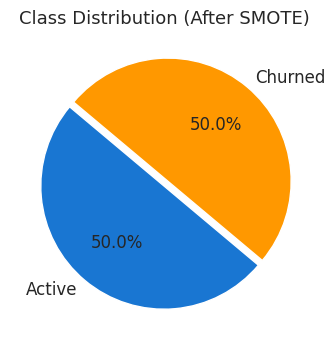

In [35]:
# Pie chart for class distribution after SMOTE
labels = ['Active', 'Churned']
sizes = y_train_bal.value_counts().sort_index().values
colors = ['#1976D2', '#FF9800']

plt.figure(figsize=(4, 4))
plt.pie(
    sizes, labels=labels, autopct='%1.1f%%', startangle=140,
    colors=colors, explode=[0, 0.05], textprops={'fontsize': 12}
)
plt.title('Class Distribution (After SMOTE)', fontsize=13)
plt.show()

### **4.3 Feature Scaling (Standardization)**

**Standardize key numerical features** for models sensitive to scale (Logistic Regression).  
*Fit scaler on training data, then apply to test data.*

In [36]:
# List of columns to scale (исключаем one-hot, только реальные числовые фичи)
num_scale_cols = [
    'OrderCount', 'CouponUsed', 'DaySinceLastOrder', 'WarehouseToHome',
    'NumberOfDeviceRegistered', 'Tenure', 'HourSpendOnApp', 'NumberOfAddress',
    'OrderAmountHikeFromlastYear', 'CashbackAmount']

scaler = StandardScaler()

# Fit scaler only on training set, transform both
X_train_scaled = X_train_bal.copy()
X_test_scaled = X_test.copy()

X_train_scaled[num_scale_cols] = scaler.fit_transform(X_train_bal[num_scale_cols])
X_test_scaled[num_scale_cols] = scaler.transform(X_test[num_scale_cols])

---

###**4.4 Baseline Model: Logistic Regression**

**Baseline Model: Logistic Regression**  
We train a simple logistic regression to set a reference point for model comparison.

Accuracy: 0.8586666666666667
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.89      0.91       936
           1       0.56      0.70      0.62       189

    accuracy                           0.86      1125
   macro avg       0.75      0.79      0.77      1125
weighted avg       0.87      0.86      0.86      1125



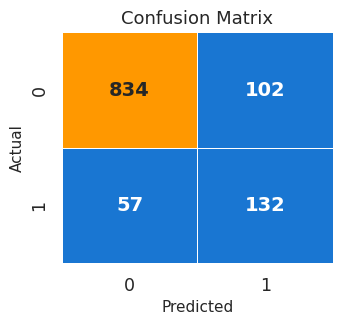

In [37]:
# Train logistic regression
logreg = LogisticRegression(random_state=42, max_iter=500)
logreg.fit(X_train_scaled, y_train_bal)

# Prediction
y_pred = logreg.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(3.5, 3))
sns.heatmap(
    cm,
    annot=True, fmt="d",
    cmap=sns.color_palette(['#1976D2', '#FF9800'], as_cmap=True),
    cbar=False,
    linewidths=0.5,
    linecolor='white',
    annot_kws={'fontsize':14, 'fontweight':'bold'}
)
plt.xlabel('Predicted', fontsize=11)
plt.ylabel('Actual', fontsize=11)
plt.title('Confusion Matrix', fontsize=13)
plt.show()

**Summary (Baseline Logistic Regression)**

- The model achieves **85% accuracy** on the test set.
- Recall for the Churn class is **0.70**, with precision at **0.56**.
- Logistic Regression provides a strong starting point for further model improvement.

---

### **4.5 Advanced Models and Comparison**

We compare multiple classification models **(Logistic Regression, Decision Tree, Random Forest)** to find the best approach for churn prediction.

,Model,Precision,Accuracy,Recall,F1
2,Random Forest,0.603524,0.873778,0.724868,0.658654
0,Logistic Regression,0.564103,0.858667,0.698413,0.624113
1,Decision Tree,0.449275,0.807111,0.656085,0.533333


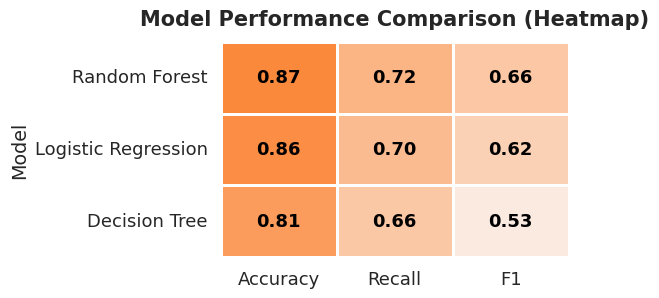

In [39]:
# models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=500),
    'Decision Tree': DecisionTreeClassifier(random_state=42, max_depth=5),
    'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=7, random_state=42)
}

results = []

# Train, predict and collect scores for each model
for name, model in models.items():
    model.fit(X_train_scaled, y_train_bal)
    y_pred = model.predict(X_test_scaled)
    pre = precision_score(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results.append({'Model': name,'Precision':pre, 'Accuracy': acc, 'Recall': rec, 'F1': f1})

# Create dataframe with results
results_df = pd.DataFrame(results).sort_values('Recall', ascending=False)
display(results_df)

# heatmap visualization without colorbar
custom_cmap = LinearSegmentedColormap.from_list(
    'custom_cmap', ['#004aba', '#faf4f0', '#fc6500'], N=256)

plt.figure(figsize=(6, 3.2))
sns.heatmap(
    results_df.set_index('Model')[['Accuracy', 'Recall', 'F1']],
    annot=True,
    fmt='.2f',
    cmap=custom_cmap,
    linewidths=1,
    linecolor='white',
    cbar=False,  # Remove the colorbar
    annot_kws={"fontsize":13, "fontweight":'bold', "color":"black"},
    vmin=0, vmax=1
)
plt.title('Model Performance Comparison (Heatmap)', fontsize=15, fontweight='bold', pad=12)
plt.yticks(fontsize=13, rotation=0)
plt.xticks(fontsize=13)
plt.tight_layout()
plt.show()

**Model Comparison Summary**

- **Random Forest** outperformed other models with the highest accuracy and recall.
- **Logistic Regression** showed robust performance, making it a reliable baseline.
- **Decision Tree** performed worst, highlighting the value of ensemble methods.

Next, we analyze ROC and Precision-Recall curves to further assess model performance.

---

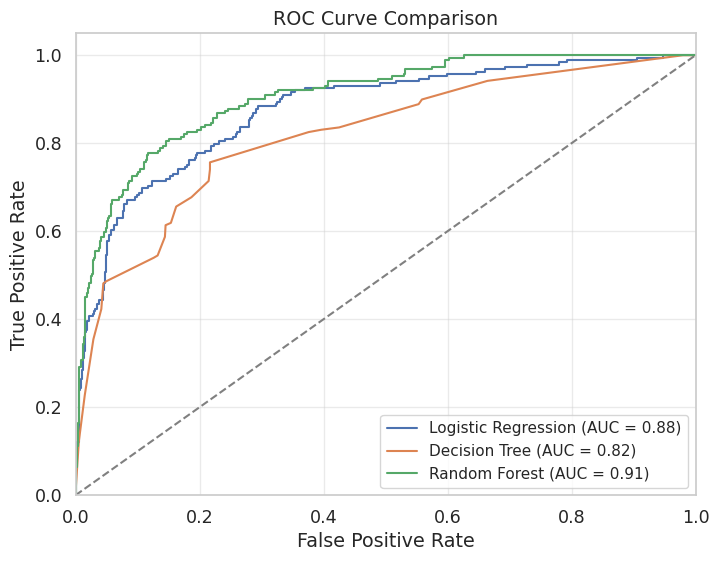

In [41]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(8,6))
for name, model in models.items():
    y_proba = model.predict_proba(X_test_scaled)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right", fontsize=11)
plt.grid(axis='both', alpha=0.4)
plt.show()

**ROC Curve Summary**

- **Random Forest**: Best AUC, strong churn discrimination.
- **Logistic Regression**: High AUC, reliable baseline.
- **Decision Tree**: Lower AUC, weaker overall.


---

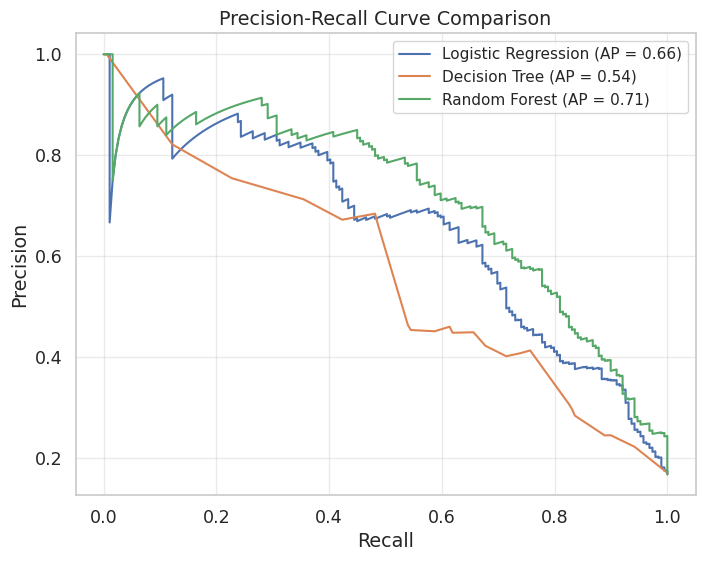

In [42]:
from sklearn.metrics import precision_recall_curve, average_precision_score

plt.figure(figsize=(8,6))
for name, model in models.items():
    y_proba = model.predict_proba(X_test_scaled)[:,1]
    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    avg_precision = average_precision_score(y_test, y_proba)
    plt.plot(recall, precision, label=f'{name} (AP = {avg_precision:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve Comparison')
plt.legend(loc="upper right", fontsize=11)
plt.grid(axis='both', alpha=0.4)
plt.show()

**Precision-Recall Curve Summary**
- **Random Forest**: Best precision-recall tradeoff.
- **Logistic Regression**: Solid results.
- **Decision Tree**: Noticeably weaker.

---
---

**Final Project Summary**
--

####**Business Goal**


The primary business goal was to **identify and predict the drivers of customer churn** in an e-commerce setting.  
Our analysis revealed a **strong correlation between churn and short customer tenure**: new customers are much more likely to leave.  
**Targeted retention campaigns** should focus on these at-risk new users to reduce churn and boost customer lifetime value.  
Additionally, special attention is needed for customers with **low satisfaction or recent complaints** to address their issues and improve loyalty.


---

####**Project Steps**


- **Data cleaning and preparation:** Removed inconsistencies, handled missing values, merged similar categories.
- **Exploratory Data Analysis:** Explored key patterns and feature distributions, detected outliers, and performed statistical analysis.
- **Feature Engineering:** Created new features (e.g., Tenure Groups, RFM Score) to capture customer behavior and segmentation.
- **Model Building:** Compared several machine learning models to predict churn and identify key drivers.

---

#####**Key Analytical Insights**


- Churn is highest among **new customers** with **short tenure and low satisfaction.**
- **Complaints and distance** from warehouse significantly increase churn risk.
- **Payment method, marital status**, and **recent order activity** are also important predictors.
- Feature engineering added valuable business context, improving model interpretability.

---

####**Model Performance**

- **Random Forest achieved the best overall recall and F1-score** for identifying churned customers.
- Logistic Regression provided strong baseline results and interpretability.
- Decision Tree offered a simple, visualizable model with moderate performance.

---

>Focusing marketing efforts on new, unsatisfied, or complaining customers will help reduce churn and increase retention.